In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.defaultdef = "plotly_white"

In [3]:
df =pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv",encoding = 'latin1')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
print(pd.isnull(df).sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [10]:
print("-------Duplicate------")
print(df.duplicated().sum())

-------Duplicate------
0


In [11]:
print("Remove Duplicate")
df.drop_duplicates(inplace=True)

Remove Duplicate


In [12]:
df.dropna(inplace=True)
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [13]:
# Convert columns to appropriate data types
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['DoW'] = df['Order Date'].dt.dayofweek
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,DoW
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [14]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month,
              x='Order Month',
              y='Sales',
              title = 'Monthly Sales')
fig.show()

In [15]:
sales_by_year = df.groupby('Order Year')['Sales'].sum().reset_index()
fig = px.line(sales_by_year,
              x='Order Year',
              y='Sales',
              title = 'Yearly Sales')
fig.show()

In [16]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()


fig = px.pie(sales_by_category,
             values ='Sales',
             names ='Category',
             hole = 0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Sales By Category', title_font=dict(size=17))

fig.show()

In [17]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, 
             x='Sub-Category', 
             y='Profit', 
             title='Sales by Sub-Category')
fig.show()

In [18]:
profits_by_category = df.groupby('Category')['Profit'].sum().reset_index()
fig = px.pie(profits_by_category,
            values = 'Profit',
            names = 'Category',
            hole = 0.5,
           color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Profits By Category', title_font=dict(size=17))

fig.show()

In [19]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()

color_pallete = colors.qualitative.Pastel1

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                    y=sales_profit_by_segment['Sales'],
                    name='Sales',
                    marker_color=color_pallete[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                    y=sales_profit_by_segment['Profit'],
                    name='Profit',
                    marker_color=color_pallete[1]))

fig.update_layout(title='Sales & Profit by Customer Segment',
                 xaxis_title = 'Customer Segment',
                 yaxis_title = 'Amount')
fig.show()









In [20]:
sales_profits_by_segemts = df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).round(2).reset_index()
sales_profits_by_segemts['Sales_to_Profit_Ratio']= sales_profits_by_segemts['Sales'] / sales_profits_by_segemts['Profit']
print(sales_profits_by_segemts[['Segment','Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659470
1    Corporate               7.677246
2  Home Office               7.125416


In [21]:
# Add a new column for the shipping duration
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

region_sales = df.groupby('Region')['Sales'].sum().round(2).reset_index()
print(region_sales)

    Region      Sales
0  Central  501239.89
1     East  678781.24
2    South  391721.90
3     West  725457.82


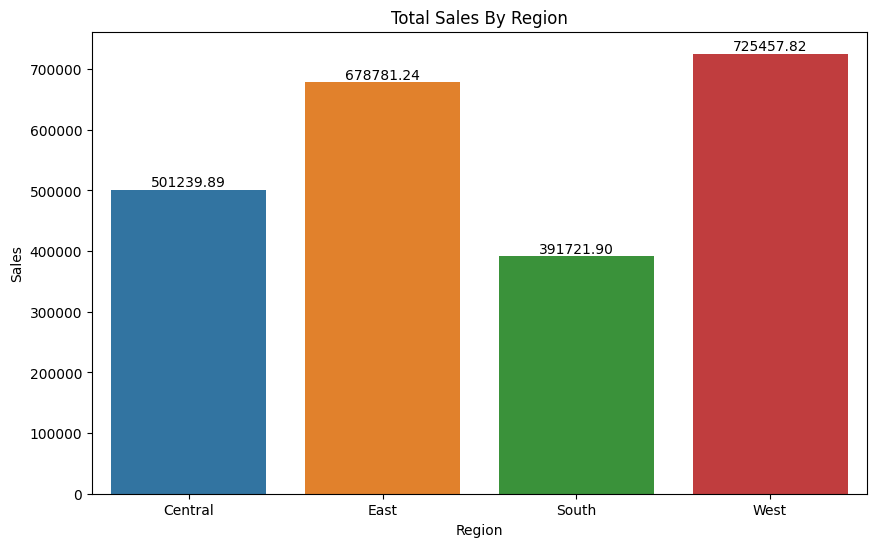

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region',y='Sales',data=region_sales)

plt.title('Total Sales By Region')
for i, value in enumerate(region_sales['Sales']):
    plt.text(i,value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

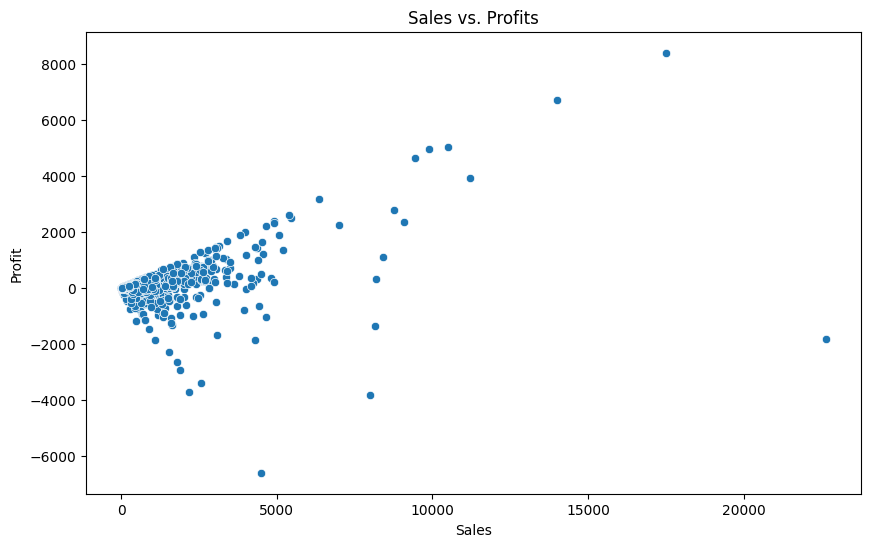

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales',y='Profit',data=df)
plt.title("Sales vs. Profits")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



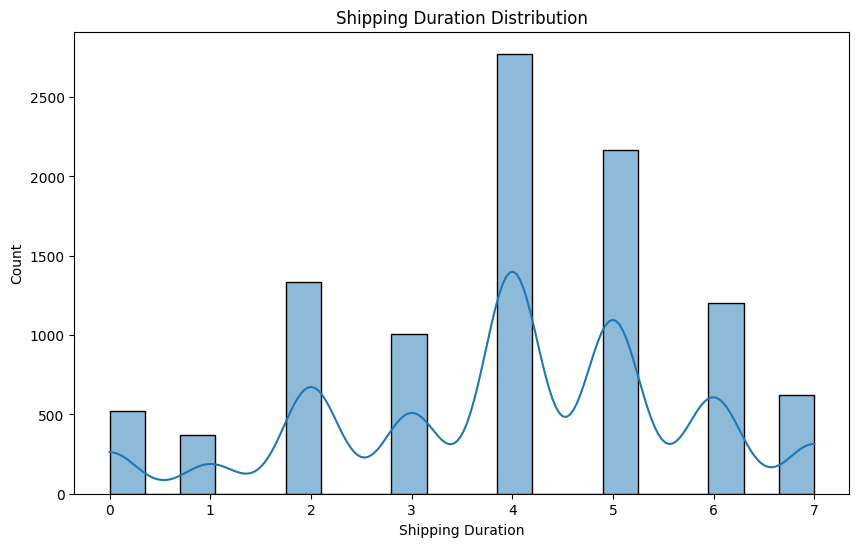

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Shipping Duration'], bins=20, kde=True)
plt.title('Shipping Duration Distribution')
plt.show()

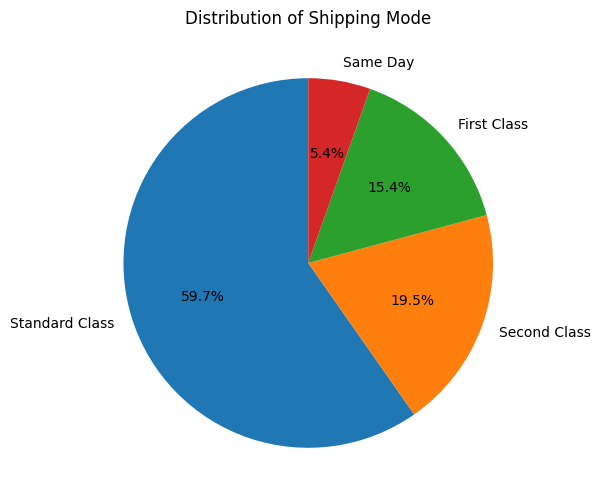

In [25]:
ship_mode_counts = df['Ship Mode'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(ship_mode_counts, labels=ship_mode_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Shipping Mode')   
plt.show()

In [26]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,DoW,Shipping Duration
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6,7


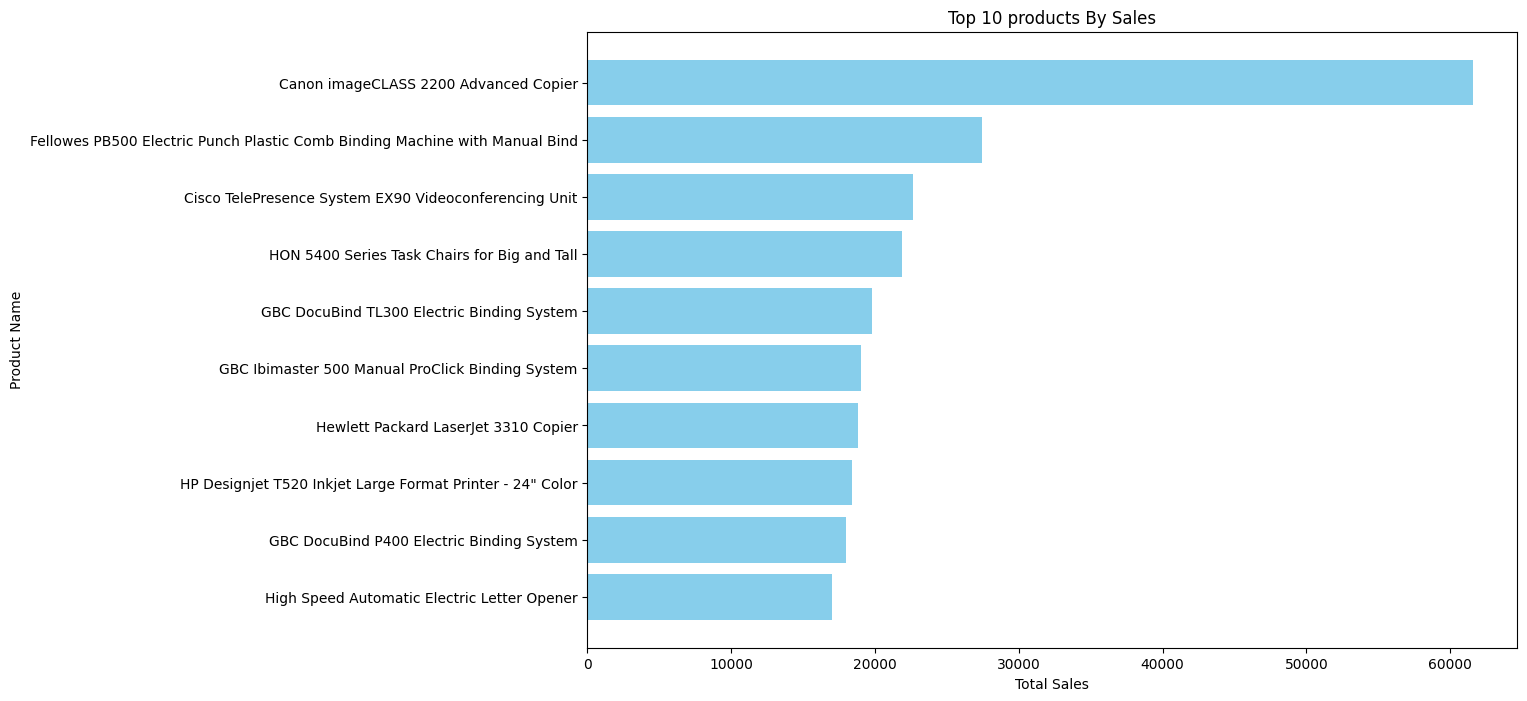

In [27]:
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()
product_sales = product_sales.sort_values(by='Sales', ascending=False)
top_10_product = product_sales.head(10)
plt.figure(figsize=(12,8))
plt.barh(top_10_product['Product Name'],top_10_product['Sales'],color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.title('Top 10 products By Sales')
plt.gca().invert_yaxis()
plt.show()

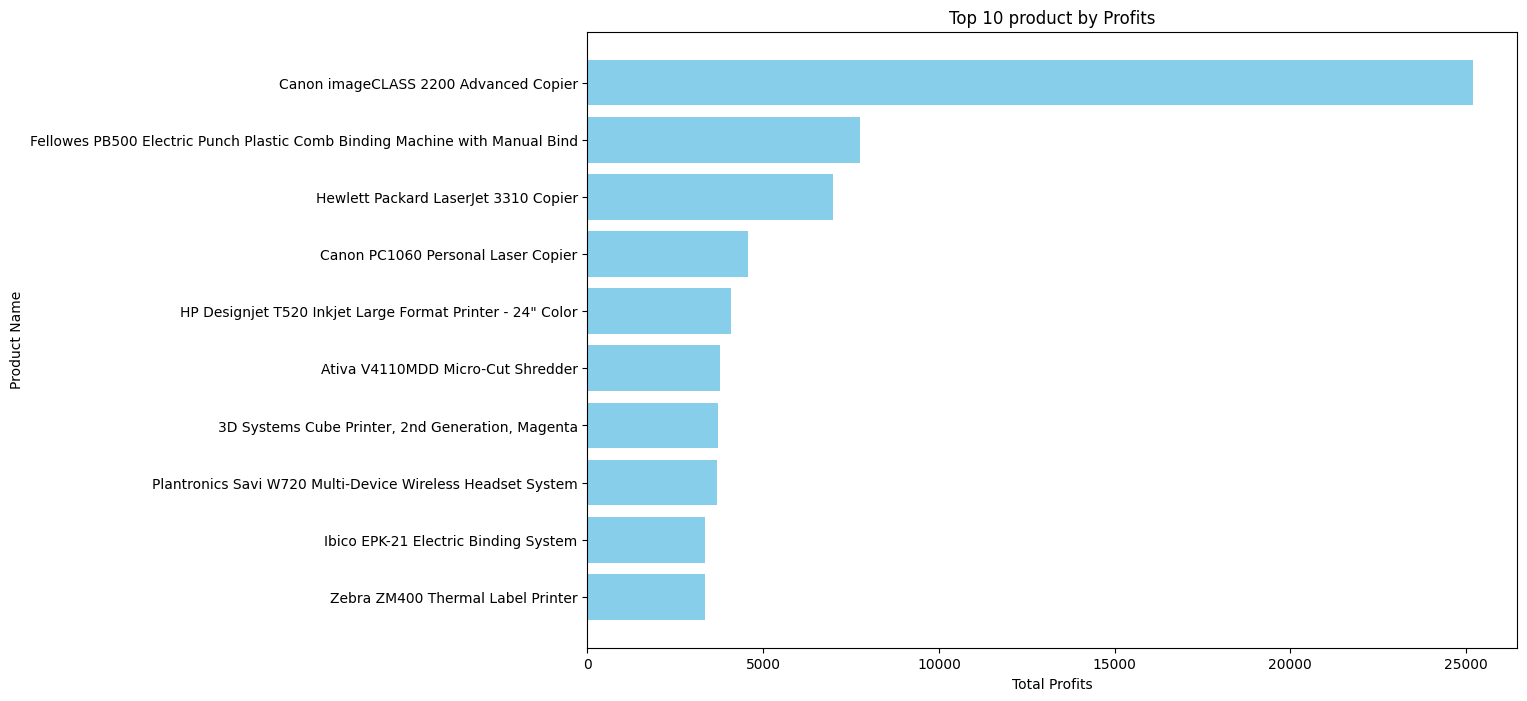

In [28]:
product_profit = df.groupby('Product Name')['Profit'].sum().reset_index()
product_profit = product_profit.sort_values(by='Profit', ascending=False)
top_10_products = product_profit.head(10)
plt.figure(figsize=(12,8))
plt.barh(top_10_products['Product Name'],top_10_products['Profit'],color='skyblue')
plt.xlabel('Total Profits')
plt.ylabel('Product Name')
plt.title("Top 10 product by Profits")
plt.gca().invert_yaxis()
plt.show()

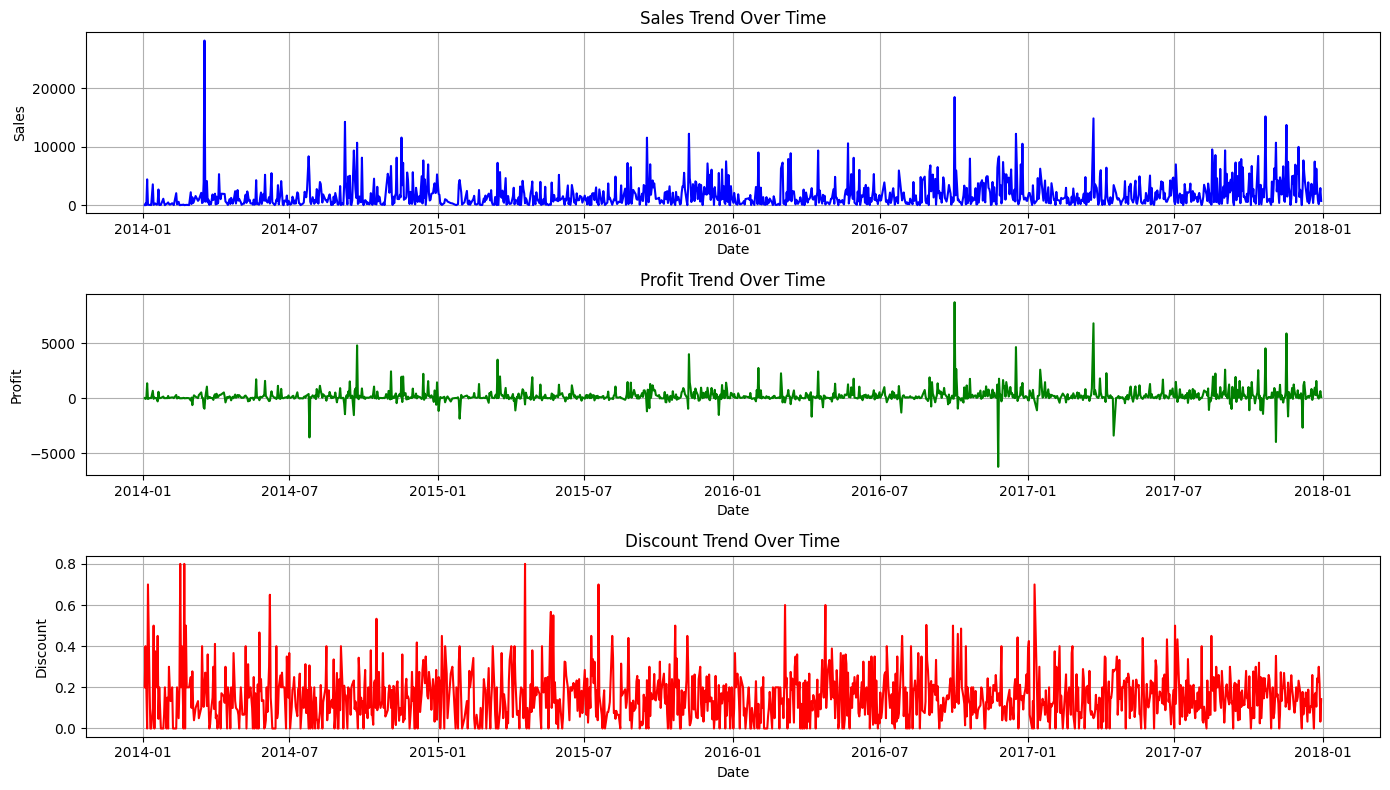

In [29]:
# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by 'Order Date' and sum the Sales, Profit, and Discount
date_grouped = df.groupby('Order Date').agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'mean'}).reset_index()

# Plot the trend of Sales, Profit, and Discount over time
plt.figure(figsize=(14, 8))

# Sales Trend
plt.subplot(3, 1, 1)
plt.plot(date_grouped['Order Date'], date_grouped['Sales'], label='Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.grid(True)

# Profit Trend
plt.subplot(3, 1, 2)
plt.plot(date_grouped['Order Date'], date_grouped['Profit'], label='Profit', color='green')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit Trend Over Time')
plt.grid(True)

# Discount Trend
plt.subplot(3, 1, 3)
plt.plot(date_grouped['Order Date'], date_grouped['Discount'], label='Discount', color='red')
plt.xlabel('Date')
plt.ylabel('Discount')
plt.title('Discount Trend Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()


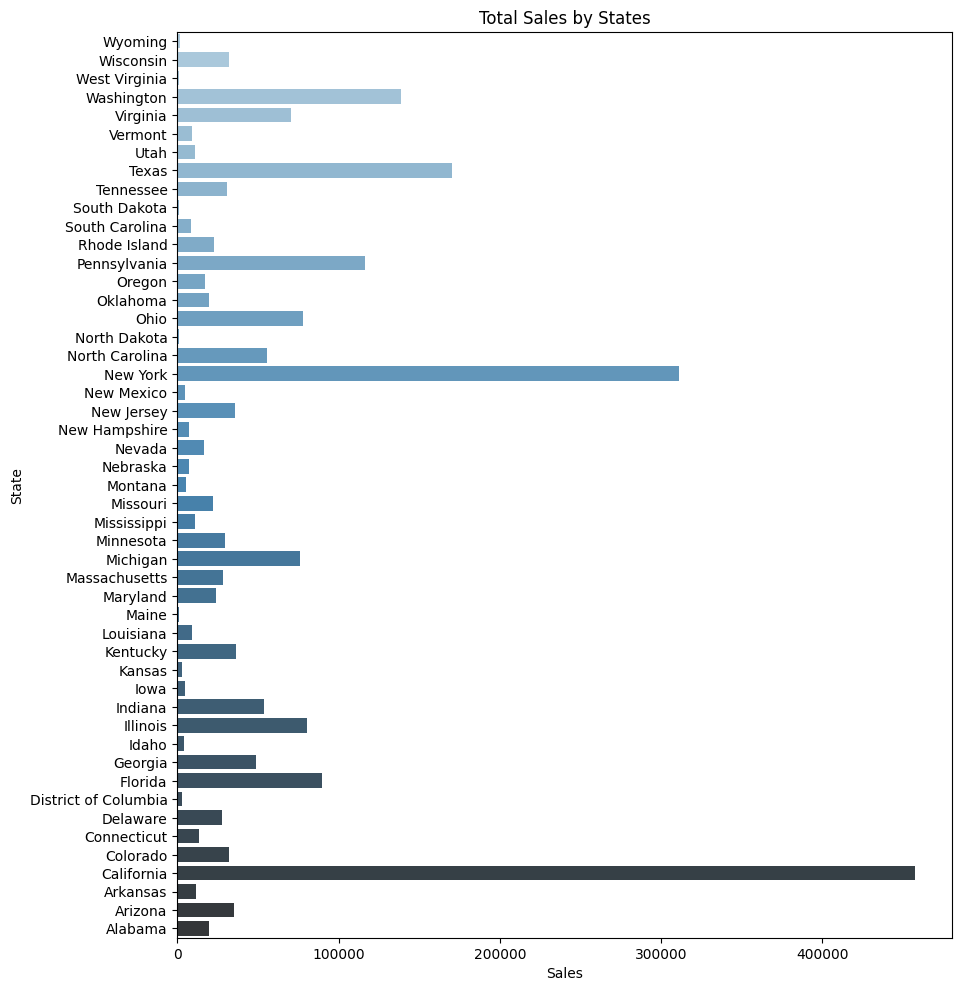

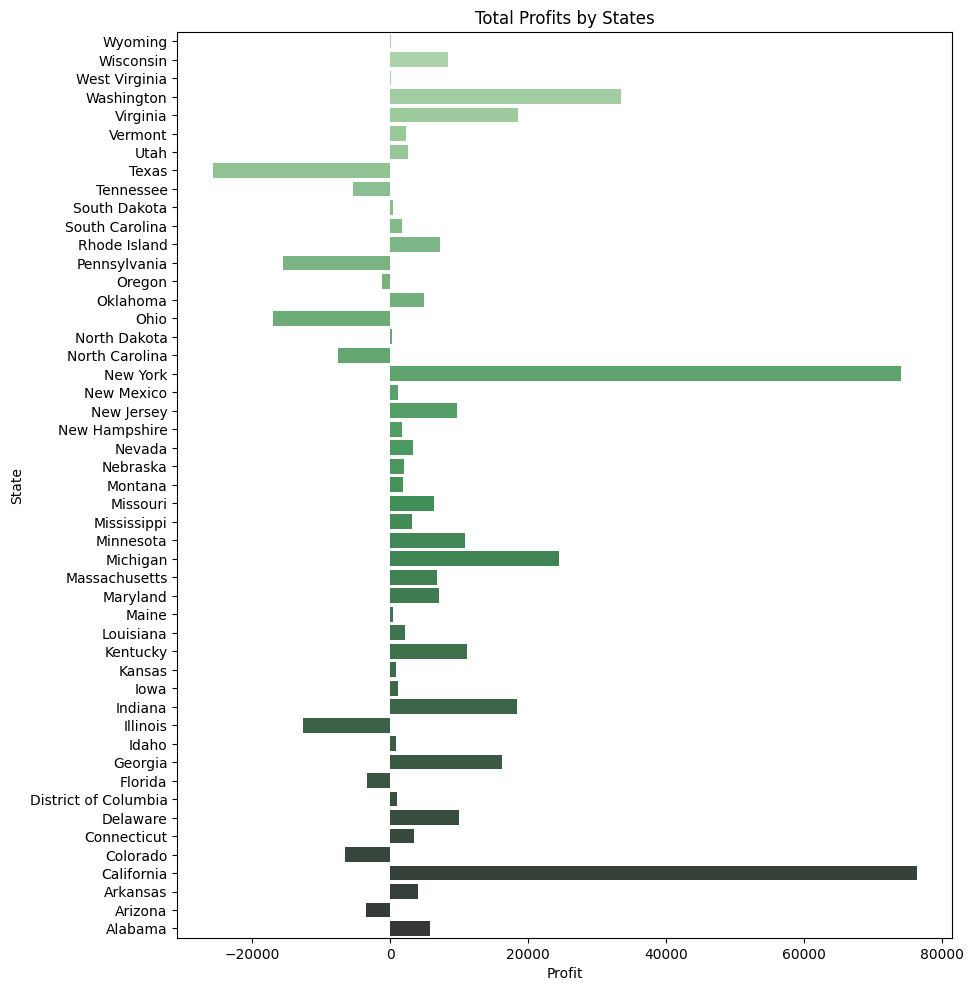

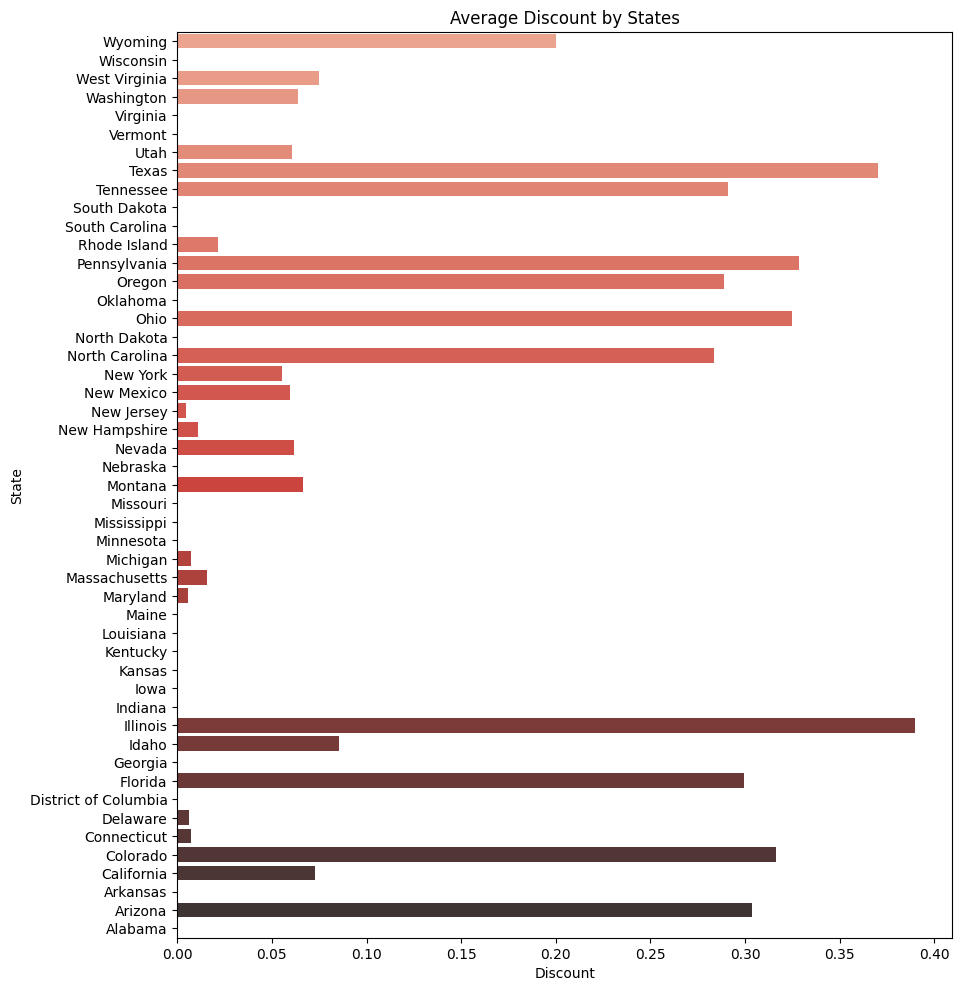

<Figure size 640x480 with 0 Axes>

In [30]:
state_grouped = df.groupby('State').agg({'Sales':'sum','Profit':'sum','Discount':'mean'}).reset_index()

state_grouped = state_grouped.sort_values(by='State',ascending=False)
plt.figure(figsize=(10,40))

plt.subplot(3,1,1)
sns.barplot(x='Sales',y='State',data=state_grouped,palette='Blues_d')
plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by States')
plt.show()

plt.figure(figsize=(10,40))
plt.subplot(3,1,2)
sns.barplot(x='Profit',y='State',data=state_grouped,palette='Greens_d')
plt.xlabel('Profit')
plt.ylabel('State')
plt.title('Total Profits by States')
plt.show()

plt.figure(figsize=(10,40))
plt.subplot(3,1,3)
sns.barplot(x='Discount',y='State',data=state_grouped,palette='Reds_d')
plt.xlabel('Discount')
plt.ylabel('State')
plt.title('Average Discount by States')
plt.show()
plt.tight_layout()
plt.show()


In [38]:
city_grouped = df.groupby('City').agg({'Sales': 'sum'}).reset_index()
city_grouped = city_grouped.sort_values(by='Sales',ascending=False)
top_10_city = city_grouped.head(10)
print(top_10_city)

fig = px.bar(top_10_city, x='City',y='Sales',title='Top 10 City by Sales',orientation='v',color='Sales')
fig.show()

              City        Sales
329  New York City  256368.1610
266    Los Angeles  175851.3410
452        Seattle  119540.7420
438  San Francisco  112669.0920
374   Philadelphia  109077.0130
207        Houston   64504.7604
80         Chicago   48539.5410
437      San Diego   47521.0290
216   Jacksonville   44713.1830
464    Springfield   43054.3420
